<a href="https://colab.research.google.com/github/Maria-Ul/Leaders-of-digital-transformation/blob/main/Appart_video_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# VIDEO preprocessing


In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import time

In [ ]:
# cap = cv.VideoCapture('/content/drive/MyDrive/video_2023-06-06_11-17-57.mp4')
# if not cap.isOpened():
#     print("Cannot open camera")
#     exit()


# while True:
#     frame_rate = 0.1
#     prev = 0

#     time_elapsed = time.time() - prev
#     res, image = cap.read()

#     if time_elapsed > 1./frame_rate:
#         prev = time.time()

#         # Do something with your image here.
#         # process_image()
#     # Capture frame-by-frame
#         ret, frame = cap.read()
#         # if frame is read correctly ret is True
#         if not ret:
#             print("Can't receive frame (stream end?). Exiting ...")
#             break
#         # Our operations on the frame come here
#         gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
#         # Display the resulting frame
#         cv2_imshow(gray)
#     if cv.waitKey(1) == ord('q'):
#         break
# # When everything done, release the capture
# cap.release()
# cv.destroyAllWindows()


In [ ]:
# import torch
# import torchvision
# from torchvision.datasets.utils import download_url
# torchvision.set_video_backend("video_reader")

# # Download the sample video
# download_url(
#     "https://github.com/pytorch/vision/blob/main/test/assets/videos/WUzgd7C1pWA.mp4?raw=true",
#     ".",
#     "WUzgd7C1pWA.mp4"
# )
# video_path = "./WUzgd7C1pWA.mp4"

In [ ]:

from __future__ import print_function, division

import os
import pickle

import cv2
import numpy as np
import torch
from torch.utils.data import Dataset

In [ ]:
class GeneralVideoDataset(Dataset):
    """Dataset Class for Loading Video"""

    def __init__(
        self,
        clips_list_file,
        root_dir,
        channels,
        time_depth,
        x_size,
        y_size,
        mean,
        transform=None,
    ):
        """
        Args:
            clips_list_file (string): Path to the clipsList file with labels.
            root_dir (string): Directory with all the videoes.
            transform (callable, optional): Optional transform to be applied
                on a sample.
            channels: Number of channels of frames
            time_depth: Number of frames to be loaded in a sample
            x_size, y_size: Dimensions of the frames
            mean: Mean value of the training set videos over each channel
        """
        with open(clips_list_file, "rb") as fp:  # Unpickling
            clips_list_file = pickle.load(fp)

        self.clips_list = clips_list_file
        self.root_dir = root_dir
        self.channels = channels
        self.time_depth = time_depth
        self.x_size = x_size
        self.y_size = y_size
        self.mean = mean
        self.transform = transform

    def __len__(self):
        return len(self.clipsList)

    def read_video(self, video_file):
        # Open the video file
        cap = cv2.VideoCapture(video_file)
        frames = torch.FloatTensor(
            self.channels, self.time_depth, self.x_size, self.y_size
        )
        failed_clip = False
        for f in range(self.time_depth):

            ret, frame = cap.read()
            if ret:
                frame = torch.from_numpy(frame)
                # HWC2CHW
                frame = frame.permute(2, 0, 1)
                frames[:, f, :, :] = frame

            else:
                print("Skipped!")
                failed_clip = True
                break

        for idx in range(len(self.mean)):
            frames[idx] = (frames[idx] - self.mean[idx]) / self.stddev[idx]

        return frames, failed_clip

    def __getitem__(self, idx):

        video_file = os.path.join(self.root_dir, self.clips_list[idx][0])
        clip, failed_clip = self.read_video(video_file)
        if self.transform:
            clip = self.transform(clip)
        sample = {
            "clip": clip,
            "label": self.clips_list[idx][1],
            "failedClip": failed_clip,
        }

        return sample

In [ ]:
import torch
import matplotlib.pyplot as plt


In [ ]:
def read_video(video_file, freq = 10):
    # Open the video file
    cap = cv.VideoCapture(video_file)
    frames = []
    # frames = torch.FloatTensor(
    #     channels, time_depth, x_size, y_size
    # )
    failed_clip = False
    # for f in range(time_depth):
    it = 0
    while cap.isOpened():
        it+=1
        ret, frame = cap.read()
        if it%freq==0:

          if ret:
              # frame = torch.from_numpy(frame)
              # HWC2CHW
              # frame = np.transpose(frame,(2, 0, 1))
              frames.append(frame)

          else:
              print("Skipped!")
              failed_clip = True
              print(it)
              break

    # for idx in range(len(mean)):
    #     frames[idx] = (frames[idx] - self.mean[idx]) / self.stddev[idx]

    return frames, failed_clip

In [ ]:
frames, failed_clip = read_video('/content/drive/MyDrive/лцт/video_2023-06-06_11-17-57.mp4', freq = 100)

Skipped!
1200


In [ ]:
frames1, failed_clip = read_video('/content/drive/MyDrive/лцт/video_2023-06-06_11-17-57.mp4', freq = 100)

Skipped!
1200


In [ ]:
print(len(frames))

In [ ]:
print(len(frames1))

11


In [ ]:
plt.imshow(frames[5].permute(1, 2, 0))

AttributeError: ignored

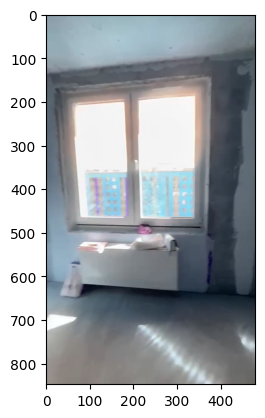

In [ ]:
plt.imshow(frames1[5].permute(1, 2, 0))

In [ ]:
for i in range(len(frames)):
  plt.imshow(frames[i])#.permute(1, 2, 0))
  plt.show()

# load data

In [ ]:
!unzip /content/drive/MyDrive/labeled_data.zip -d /content/data_new



## labeler.py


In [ ]:
import os
import shutil

images = os.listdir('/content/data_new/data_new/с черновой отделкой')

for image in images:
  img_name = image.split('.')[0]
  shutil.copyfile(f'/content/data_new/data_new/с черновой отделкой/{image}',f'/content/data_labeled/images/{img_name}_1.jpg')
  with open(f'/content/data_labeled/labels/{img_name}_1.txt', 'w') as file:
    file.write('1 0.5 0.5 1 1')


In [ ]:
!unzip /content/data2.zip -d /content/data2


In [ ]:
!unzip /content/labeled_data.zip -d /content/data_labeled

Archive:  /content/labeled_data.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/labeled_data.zip or
        /content/labeled_data.zip.zip, and cannot find /content/labeled_data.zip.ZIP, period.


# YOLO

In [ ]:
!pip install ultralytics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.6/595.6 kB 12.0 MB/s eta 0:00:00


old

In [ ]:
from ultralytics import YOLO


# Load a model
# model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('/content/drive/MyDrive/лцт/best_93_epochs.pt')  # load a pretrained model (recommended for training)
# model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights



10 06

In [ ]:
from ultralytics import YOLO


# Load a model
# model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('/content/best_3.pt')  # load a pretrained model (recommended for training)
# model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights



In [ ]:
# frames = [np.array(frame) for frame in frames]
# inputs = frames  # list of numpy arrays
inputs = frames
results = model(inputs, stream = True)  # list of Results objects

In [ ]:

# results = model(inputs) # source already setup
names = model.names
c_0 = 0
c_1 = 0
c_2 = 0
c_3 = 0
c_4 = 0
c_5 = 0
c_6 = 0
c_7 = 0
c_8 = 0
for r in results:
    for c in r.boxes.cls:
      if names[int(c)]=='finished': c_2+=1
      if names[int(c)]=='semifinished':c_1+=1
      if names[int(c)]=='unfinished':c_0+=1
      if (c)==3: c_3+=1
      if (c)==4: c_4+=1
      if (c)==5: c_5+=1
      if (c)==6: c_6+=1
      if (c)==7: c_7+=1
      if (c)==8: c_8+=1
      print(names[int(c)])



0: 640x384 1 finished, 1: 640x384 1 finished, 2: 640x384 1 finished, 3: 640x384 1 finished, 4: 640x384 1 unfinished, 5: 640x384 1 finished, 6: 640x384 1 finished, 7: 640x384 1 finished, 8: 640x384 1 finished, 9: 640x384 1 finished, 10: 640x384 1 finished, 34.5ms
Speed: 2.7ms preprocess, 3.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


h
finished
h
finished
h
finished
h
finished
h
unfinished
h
finished
h
finished
h
finished
h
finished
h
finished
h
finished


In [ ]:
print(c_0, c_1, c_2, c_3, c_4, c_5, c_6, c_7,c_8)

1 0 10 0 0 0 0 0 0


In [ ]:
round(c_3/(c_3+c_2+c_1)*100,0), " %"

ZeroDivisionError: ignored

In [ ]:
for i in range(len(frames)):
  plt.imshow(frames[i])#.permute(1, 2, 0))
  plt.show()

In [ ]:
# !pip install ultralytics
from ultralytics import YOLO
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import time
import torch
import matplotlib.pyplot as plt
def wrapper(video_filename, freq, model_weights):
  """
  video_filename: str
    path to the video
  freq: int
    Frequency to collect frames
  model_weights: str
    pth file with weights of the model
  """

  #read_video

  # Open the video file
  cap = cv.VideoCapture(video_filename)
  frames = []
  it = 0
  while cap.isOpened():
      it+=1
      ret, frame = cap.read()
  # Split the video on frames
      if it%freq==0:
        if ret:
            frames.append(frame)
        else:
            break

  # Load the model
  model = YOLO(model_weights)  # load a pretrained model (recommended for training)
  inputs = frames
  # Predict results
  results = model(inputs, stream = True)  # list of Results objects
  for result in results:
      boxes = result.boxes  # Boxes object for bbox outputs
      masks = result.masks  # Masks object for segmentation masks outputs
      probs = result.probs  # Class probabilities for classification outputs
  names = model.names
  c_0 = 0
  c_1 = 0
  c_2 = 0
  c_3 = 0
  c_4 = 0
  c_5 = 0
  c_6 = 0
  c_7 = 0
  c_8 = 0
  for r in results:
      for c in r.boxes.cls:
        if names[int(c)]=='finished': c_2+=1
        if names[int(c)]=='semifinished':c_1+=1
        if names[int(c)]=='unfinished':c_0+=1
        if (c)==3: c_3 =True
        if (c)==4: c_4 =True
        if (c)==5: c_5 =True
        if (c)==6: c_6 =True
        if (c)==7: c_7 =True
        if (c)==8: c_8 =True
  total = round(c_2/(c_2+c_1+c_0)*100,0)
  dict_res = {'total':total, 'Power plugs and sockets': c_3, 'Kitchen appliance':c_4, 'Bathtub':c_5, 'Door':c_6, 'Window':c_7, 'Toilet':c_8 }
  return dict_res

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
